# Machine Learning for Absolute Beginners

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

## 1. Import and Verify Data

We will assume that you have performed preliminary EDA (Exploratory Data Analysis) on the dataset.

The dataset consists of ``sales`` of a particular product in 200 different markets. The three columns (``TV``, ``radio``, and ``newspaper``) are the corresponding advertising budgets for three different media in each market. 

Our goal is to create a predictive model for increasing sales based on the advertising budget.


In [2]:
# import data as pandas dataframe
df = pd.read_csv("data/advertising.csv")

In [3]:
# check first few records
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## 2. Setup Model

- Our target variable is ``sales``
- Our feature variables are ``TV``, ``newspaper``, and `` radio``
- Our model type is multiple linear regression. We will use the ols (ordinary least squares) function in statsmodels

## 3. Fit Multiple Linear Regression Model to Data

Multiple Regression model is of the form:
$$\hat y = \hat \beta_0 + \hat \beta_1x_1 + \hat \beta_2 x_2 + \ldots \beta_n x_n$$

In [5]:
model = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()

## 4. Evaluate Model Results

### Print Model Parameters

In [6]:
print(model.params)

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64


### Print Model Summary

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        11:33:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Discussion of Model Results 

$R^2$ is excellent. However, P-value for ``newspaper`` is .860 (i.e. > 0.05). Correlation matrix below also shows that the correlation between ``radio`` and ``newspaper`` is .35, which could be problematic. 

### Interepretation of Model Results

$$ \text{sales} = \text{2.94} + \text{.046} \times \text{TV} + \text{-0.0010} \times \text{newspaper}+ \text{.189} \times \text{radio}  $$

We can interpret the regression equation as follows. A \\$1000 increase in radio advertising spending leads to an average increase sales of 189 units. Similarly, a \\$1000 increase in TV advertising spending leads to an average increase sales of 46 units. The increase due to newspaper advertising is negligible.

### Correlations

<AxesSubplot:>

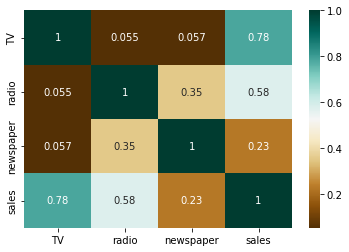

In [8]:
sns.heatmap(df.corr(),annot=True,
           
           
           
           )

<AxesSubplot:>

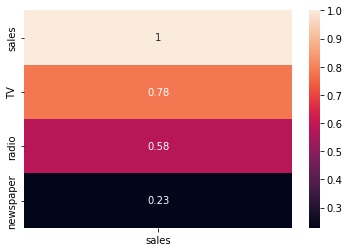

In [9]:
sns.heatmap(df.corr()[['sales']].sort_values(by="sales", ascending=False),annot=True)

## Make Predictions for New Data

In [10]:
data = [[1000,0,0],[0,1000,0],[500,500,0]]

new_data = pd.DataFrame(data,columns=['TV','radio','newspaper'])

In [11]:
model.predict(new_data)

0     48.703535
1    191.468906
2    120.086221
dtype: float64